*DIABETES ANALYSIS INDEX*
===

- [0.History](#0.History)
- [1.Correlations](#3.Correlations)
    - [1.1 Pearson Correlation](#1.1-Pearson-Correlation)
    - [1.2 Distance Correlation](#1.2-Distance-Correlation)
- [2.Features distributions exploration](#2.Features-distributions-exploration)
    - [2.1 ]
    - [2.2 ]
    - [2.3 ]
- [3.Feature Importances](#3.Feature-Importances)


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import mahalanobis
from dcor import distance_correlation
import math
import warnings

from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

import warnings
import os
import re
import pickle
import sys
#plotly.py is an interactive, open-source, and JavaScript-based graphing library for Python. 
#plotly.py is Built on top of plotly.js  
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib.gridspec as gridspec






In [3]:
#
b_data=load_diabetes(return_X_y=False, as_frame=False)
np_data = np.c_[b_data.data, b_data.target]
columns = np.append(b_data.feature_names, ["target"])
df=pd.DataFrame(np_data, columns=columns)

In [ ]:
df.shape

(442, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [43]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

1.Correlations
===

In [40]:
class Correlations():
    def __init__(self, df, corr_type):
        self.df = df
        self.corr_type = corr_type
        self.df_heatmap = pd.DataFrame()
        #Check if the object is a dataframe
        if isinstance(self.df , pd.DataFrame):  
            if corr_type == "pearson":
                self._pearson()
            elif corr_type == "dist_corr":
                self._dist_corr()
            else:
                print("Please insert the correlation type!")
        else:
                print("Argument df is not a dataframe!")

            
    def _pearson (self ,):
        self.df_heatmap = pd.DataFrame(self.df.corr(method='pearson'))
        return self._plot_corr()

    def _dist_corr(self):
        self.n_dcor = 0
        self.df_heatmap.index = [self.col_name for self.col_name in self.df.columns]
        for self.i , self.col_name in enumerate(self.df.columns) : 
            for self.j , self.col_shift  in enumerate(df.columns) : 
                self.n_dcor = distance_correlation(x = df[self.col_name], y = df[self.col_shift] , exponent = 1 )
                self.df_heatmap.loc[self.col_name,self.col_shift]=self.n_dcor
        return self._plot_corr()

    def _plot_corr(self):
        self.mask=np.zeros_like(self.df_heatmap)
        self.mask[np.triu_indices_from(self.mask)] = True
        f,ax = plt.subplots(figsize=(8,8),facecolor='white')
        sns.color_palette("rocket", as_cmap=True)  
        sns.heatmap(self.df_heatmap,annot = True,square=True, linewidths=1.5, cmap='rocket',mask=self.mask)
        return self

1.1 Pearson Correlation
--

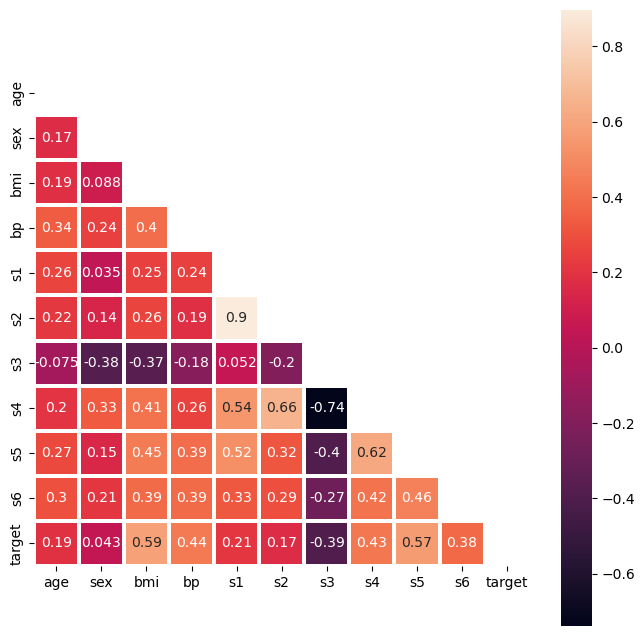

In [42]:
o_pCorr = Correlations(df = df , corr_type = "pearson")

Dal grafico che esprime le varie correlazioni lineari, si può dedurre che:
<ul>   
    <li><b>s3</b> moderatamente correlato con:</li>
        <ul>   
            <li>  <span style='color:#F1C40F'>bmi</span>   </li>
            <li>  <span style='color:orange'>sex</span>   </li>
            <li>  <span style='color:violet'>s5</span>   </li>
            <li>  <span style='color:red'>target</span>   </li>      
        </ul>        
    <li><b>bmi</b> moderatamente correlato con:</li>
        <ul>   
            <li>  <span style='color:light blue'>s4</span>   </li>
            <li>  <span style='color:violet'>s5</span>   </li>
            <li>  <span style='color:pink'>s6</span>   </li>
            <li>  <span style='color:red'>target</span>   </li>
        </ul>
    <li><b>bp</b> moderatamente correlato con:</li>
        <ul>   
            <li>  <span style='color:violet'>s5</span>   </li>
            <li>  <span style='color:pink'>s6</span>   </li>
            <li>  <span style='color:red'>target</span>   </li>
        </ul>
    <li><b>s1</b> moderatamente correlato con:</li>
        <ul>   
            <li>  <span style='color:light blue'>s4</span>   </li>
            <li>  <span style='color:violet'>s5</span>   </li>
        </ul>
</ul>    

Le correlazioni più forti sono:
<ul>   
    <li><b>s1</b> con:</li>
        <ul>   
            <li>  <span style='color:blue'>s2</span>   </li>
            <li>  <span style='color:light blue'>s4</span>   </li>
            <li>  <span style='color:violet'>s5</span>   </li>
        </ul>
    <li><b>s2</b> con:</li>
        <ul>   
            <li>  <span style='color:light blue'>s4</span>   </li>
        </ul>
    <li><b>s3</b> con:</li>
        <ul>   
            <li>  <span style='color:light blue'>s4</span>   </li>
        </ul>
    <li><b>s4</b> con:</li>
        <ul>   
            <li>  <span style='color:light blue'>s5</span>   </li>
        </ul>
    <li><b>s5</b> con:</li>
        <ul>   
            <li>  <span style='color:red'>target</span>   </li>
        </ul>
</ul>

1.2 Distance Correlation
---

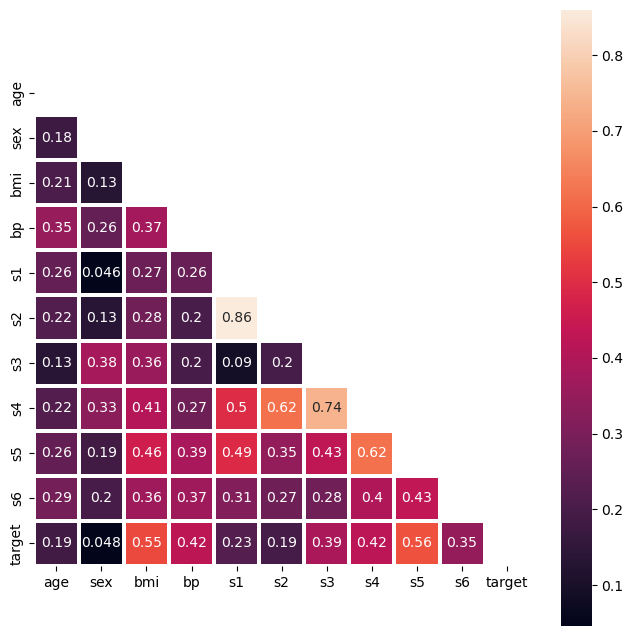

In [41]:
o_dCorr = Correlations(df = df , corr_type = "dist_corr")

In [55]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        #Check if the object is a FacetGrid or PairGrid   
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        #Check if the object is a JointGrid     
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
             
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        #GridSpecFromSubplotSpec set a plot subgrid inside the main grid where you can configure multiple plots
        self.subgrid = gridspec.GridSpecFromSubplotSpec(3,3, subplot_spec=self.subplot)
        #ax_joint è il subplot principale del jointplot
        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        #ax_marg_x è il subplot secondario in alto del jointplot
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        #ax_marg_y è il subplot secondario laterale del jointplot
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

         
 

    def _moveaxes(self, ax, gs):
        #the jointgrid would be plotted before inserting it in the grid therefore we need to remove it and reassign it 
        #to the figure and assign its position and configuration
        ax.remove()
        #Set the Figure instance the artist belongs to.
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        #https://matplotlib.org/stable/users/explain/event_handling.html
        #mpl_connect is an on event interactive feature 
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        #update the current figure 
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [8]:
def calc_subplot_num(n):
    n_sp = 1
    for i in range(1,n):
        if i < n-1 :
            n_sp = n_sp + (i+1)
    return n_sp

In [58]:
#the scope is to :
# - plot every feature pair combination without duplicates 
# - plot pearson correlation and p value for every curve 

def one_feat_compare_plot (data , feat_name , n_feat , n_subp , font_scale , x_size , y_size):
    init = True
    n_rows = int(n_feat/n_subp)+1
    fig = plt.figure( figsize=(x_size, y_size))
    sns.set(font_scale=font_scale)
    #gs is a matplotlib.gridspec.Gridspec object. A GridSpec object is a mupltiple axes container in single figure
    #when gs is indexed (like gs[0]) it points to a matplotlib.gridspec.subPlotSpec object that contains multiple axes
    gs = gridspec.GridSpec(n_rows , n_subp)
    #"r" is the row number of the grid
    r = 0
    #"k" is the dynamic column shift of the grid. It goes from 0 to n_subp
    k = 0
    #"n" is the dynamic index of the object of type matplotlib.gridspec.SubplotSpec that contains a jointplot
    n=0 
    #creating a list of n elements type []: result [[],[]...[]]
    l_grid_row = [[]] * n_subp 
    #creating a list of k elements type [[],[]...[]]: result [[[],[]...[]] , [[],[]...[]] , [[],[]...[]]]
    l_grid = [l_grid_row] * n_rows
    #muovo la feature che uso per comparare in prima posizione per poi confrontarla con tutti i seguenti
    sr_feat_to_compare = data.pop(feat_name)
    data.insert(0 , feat_name , sr_feat_to_compare )
    #cyclic shifting column c with j
    for j in range(1,data.shape[1]) :
        #When the maximum number of subplot per row is reached we have to choices
        if  j >= n_subp :
            #the grid columns index (k) of the grid is reset and the grid row index (r) is updated
            if k == n_subp-1 :
               k = 0 
               r = r + 1
            #the grid columns index (k) has to be incremented because the index c+j has not reached the end of the dataframe column index
            elif k < n_subp :
               k=k+1
               #print("prima k : {}   ".format(k))
        #If the max number of subplot is not reached add up k to the next grid column index 
        elif  j <= n_subp and  j > 1 :
           k=k+1
           #print("dopo k : {}   ".format(k))  
        #c and c+j point to the different data frame's features columns 
        print(" df_col_shift : {:d}  grid_row : {:d}  grid_col : {:d}".format( j , r , k))
        g = sns.JointGrid()
        x , y = data.columns[0], data.columns[j]
        sns.scatterplot(x=x , y=y , data = data , ax = g.ax_joint )
        sns.rugplot(x=x , y=y , data = data , ax = g.ax_joint, color="r" )
        sns.kdeplot(x=x , y=y , data = data ,  ax = g.ax_joint, color="r", zorder=0, levels=6)
        sns.kdeplot(x=x ,  data = data ,  ax = g.ax_marg_x )
        sns.kdeplot(y=y ,  data = data ,  ax = g.ax_marg_y )
        cor, p = stats.pearsonr(data[data.columns[0]], data[data.columns[j]]) 
        phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
        g.ax_joint.legend([phantom],['cor={:.1f}, p={:.3f} '.format(cor,p  )]) 
        l_grid[r][k] = g
        SeabornFig2Grid(l_grid[r][k], fig, gs[n])
        n=n+1 
    gs.tight_layout(fig)
    plt.show()    
    
      

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


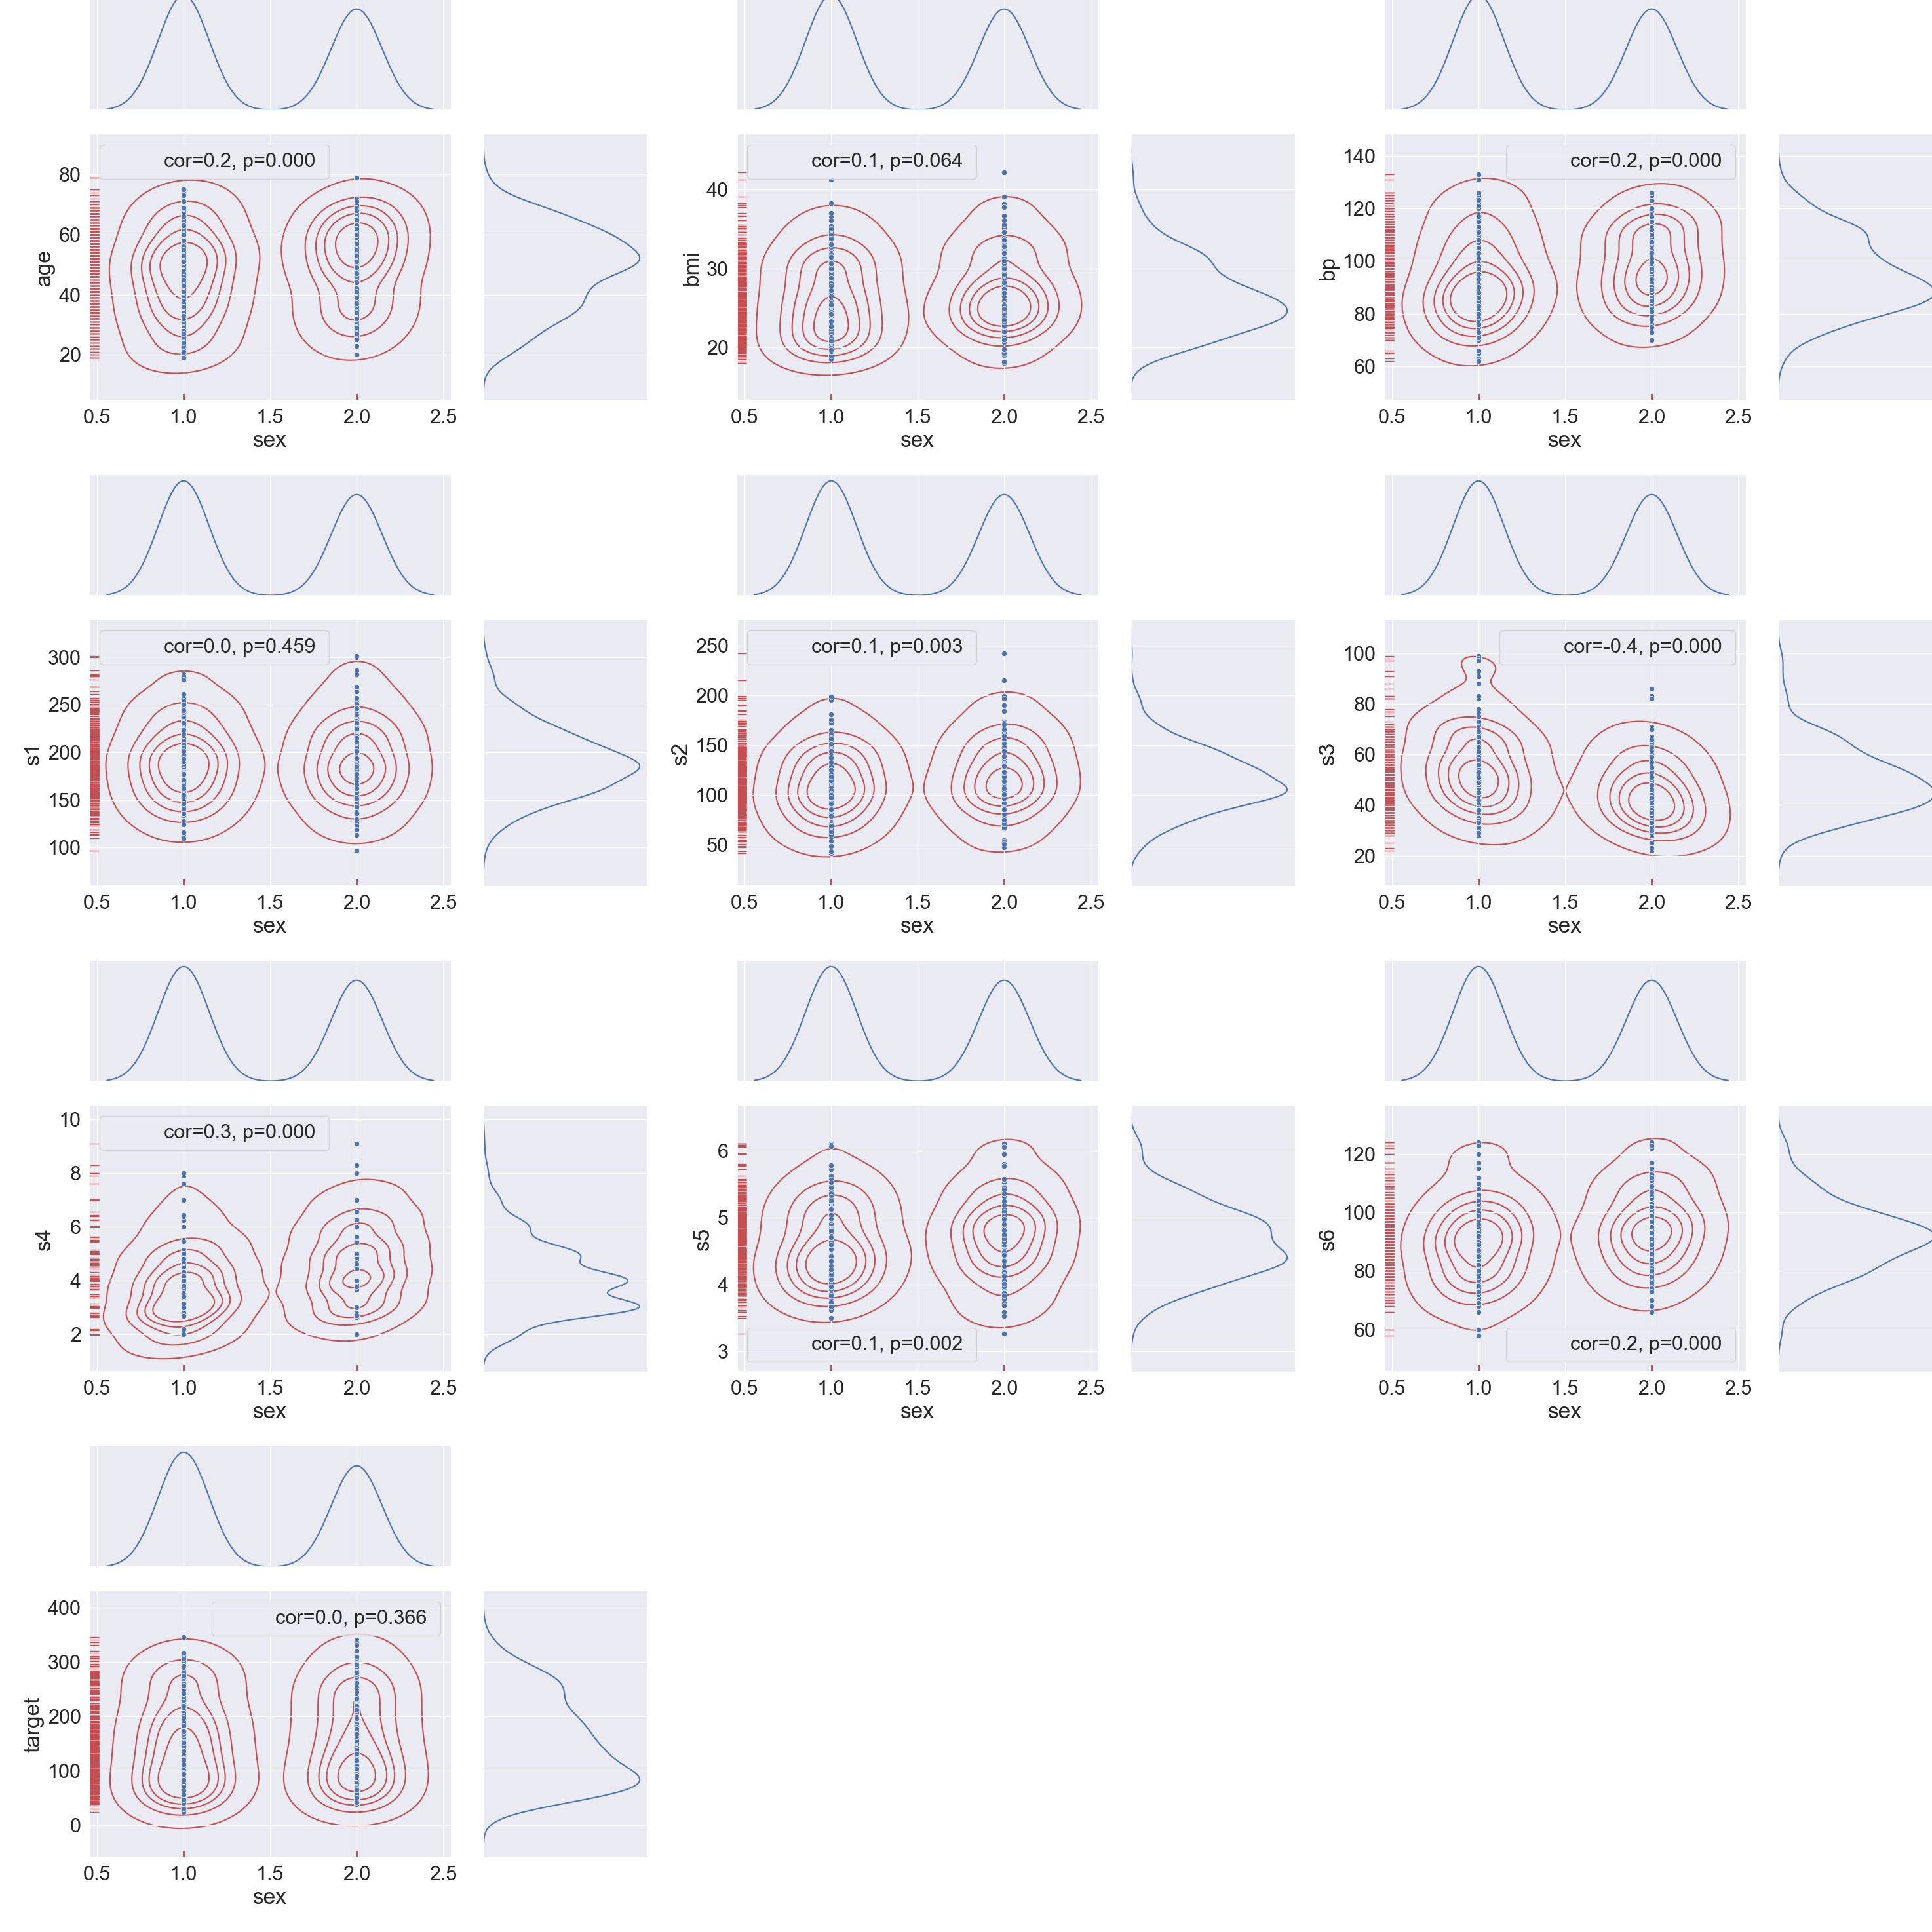

In [59]:
one_feat_compare_plot( data = df  ,
                    feat_name = "sex",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


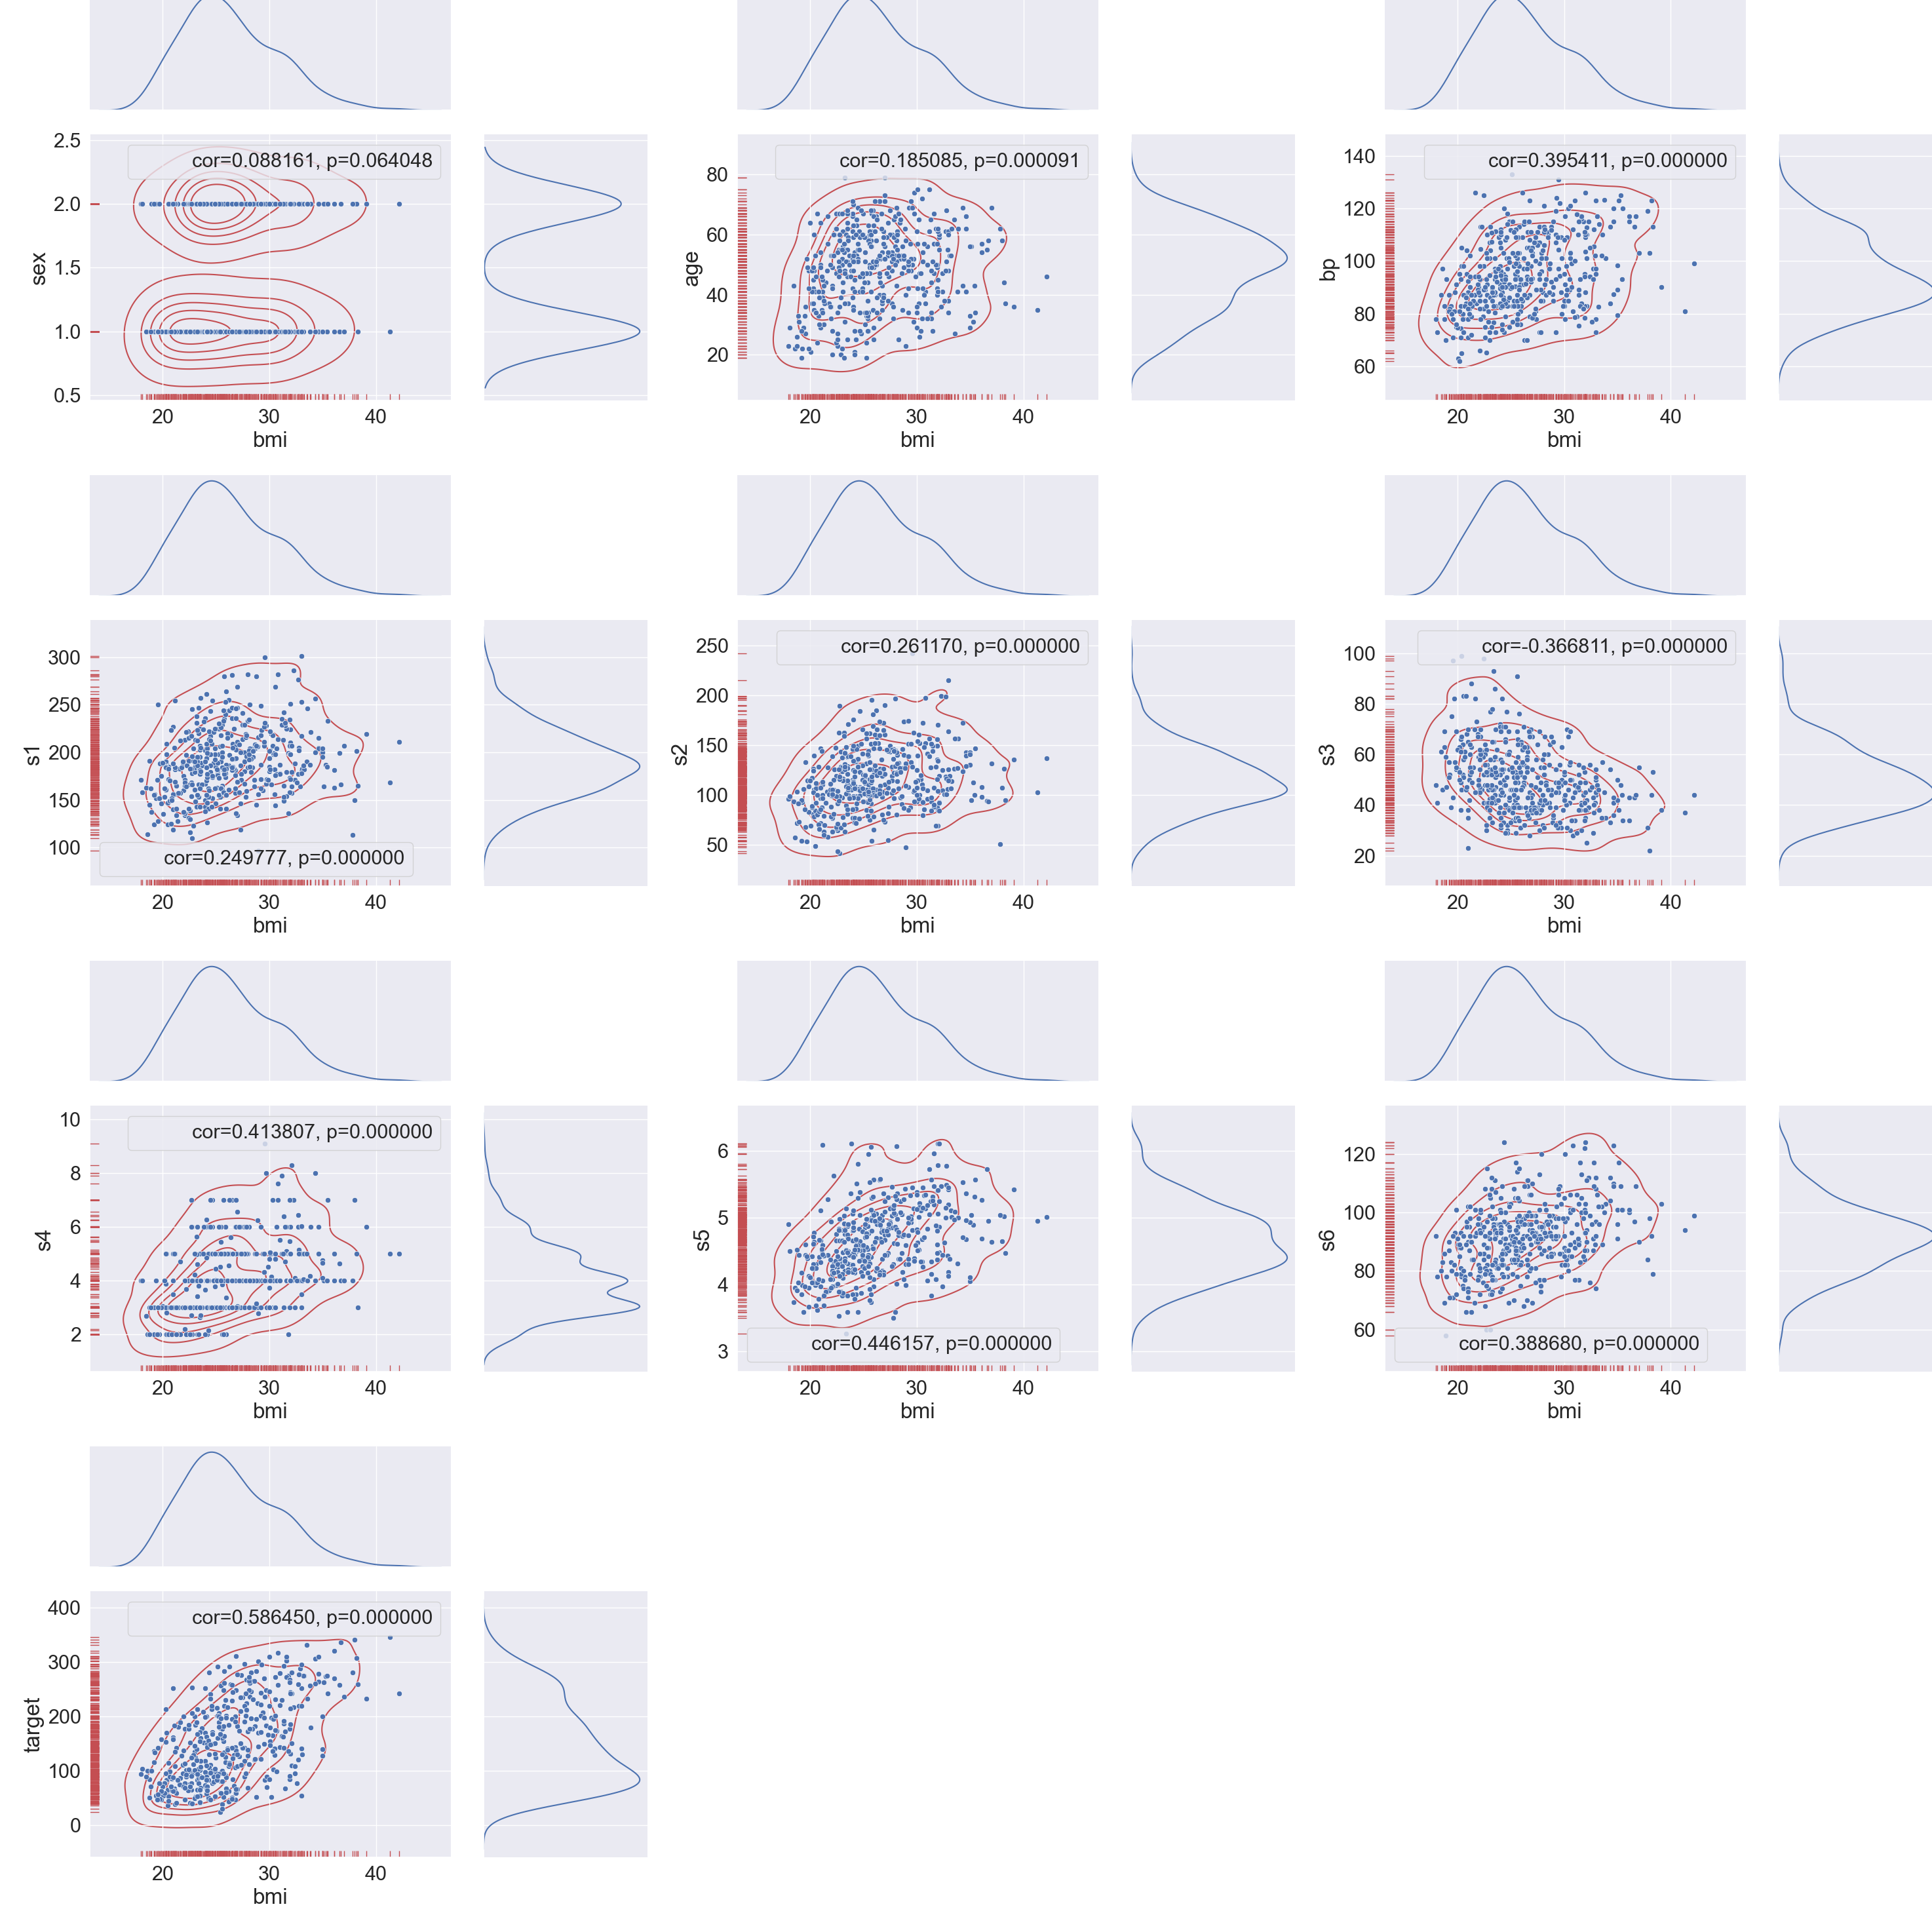

In [8]:
one_feat_compare_plot( data = df  ,
                    feat_name = "bmi",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


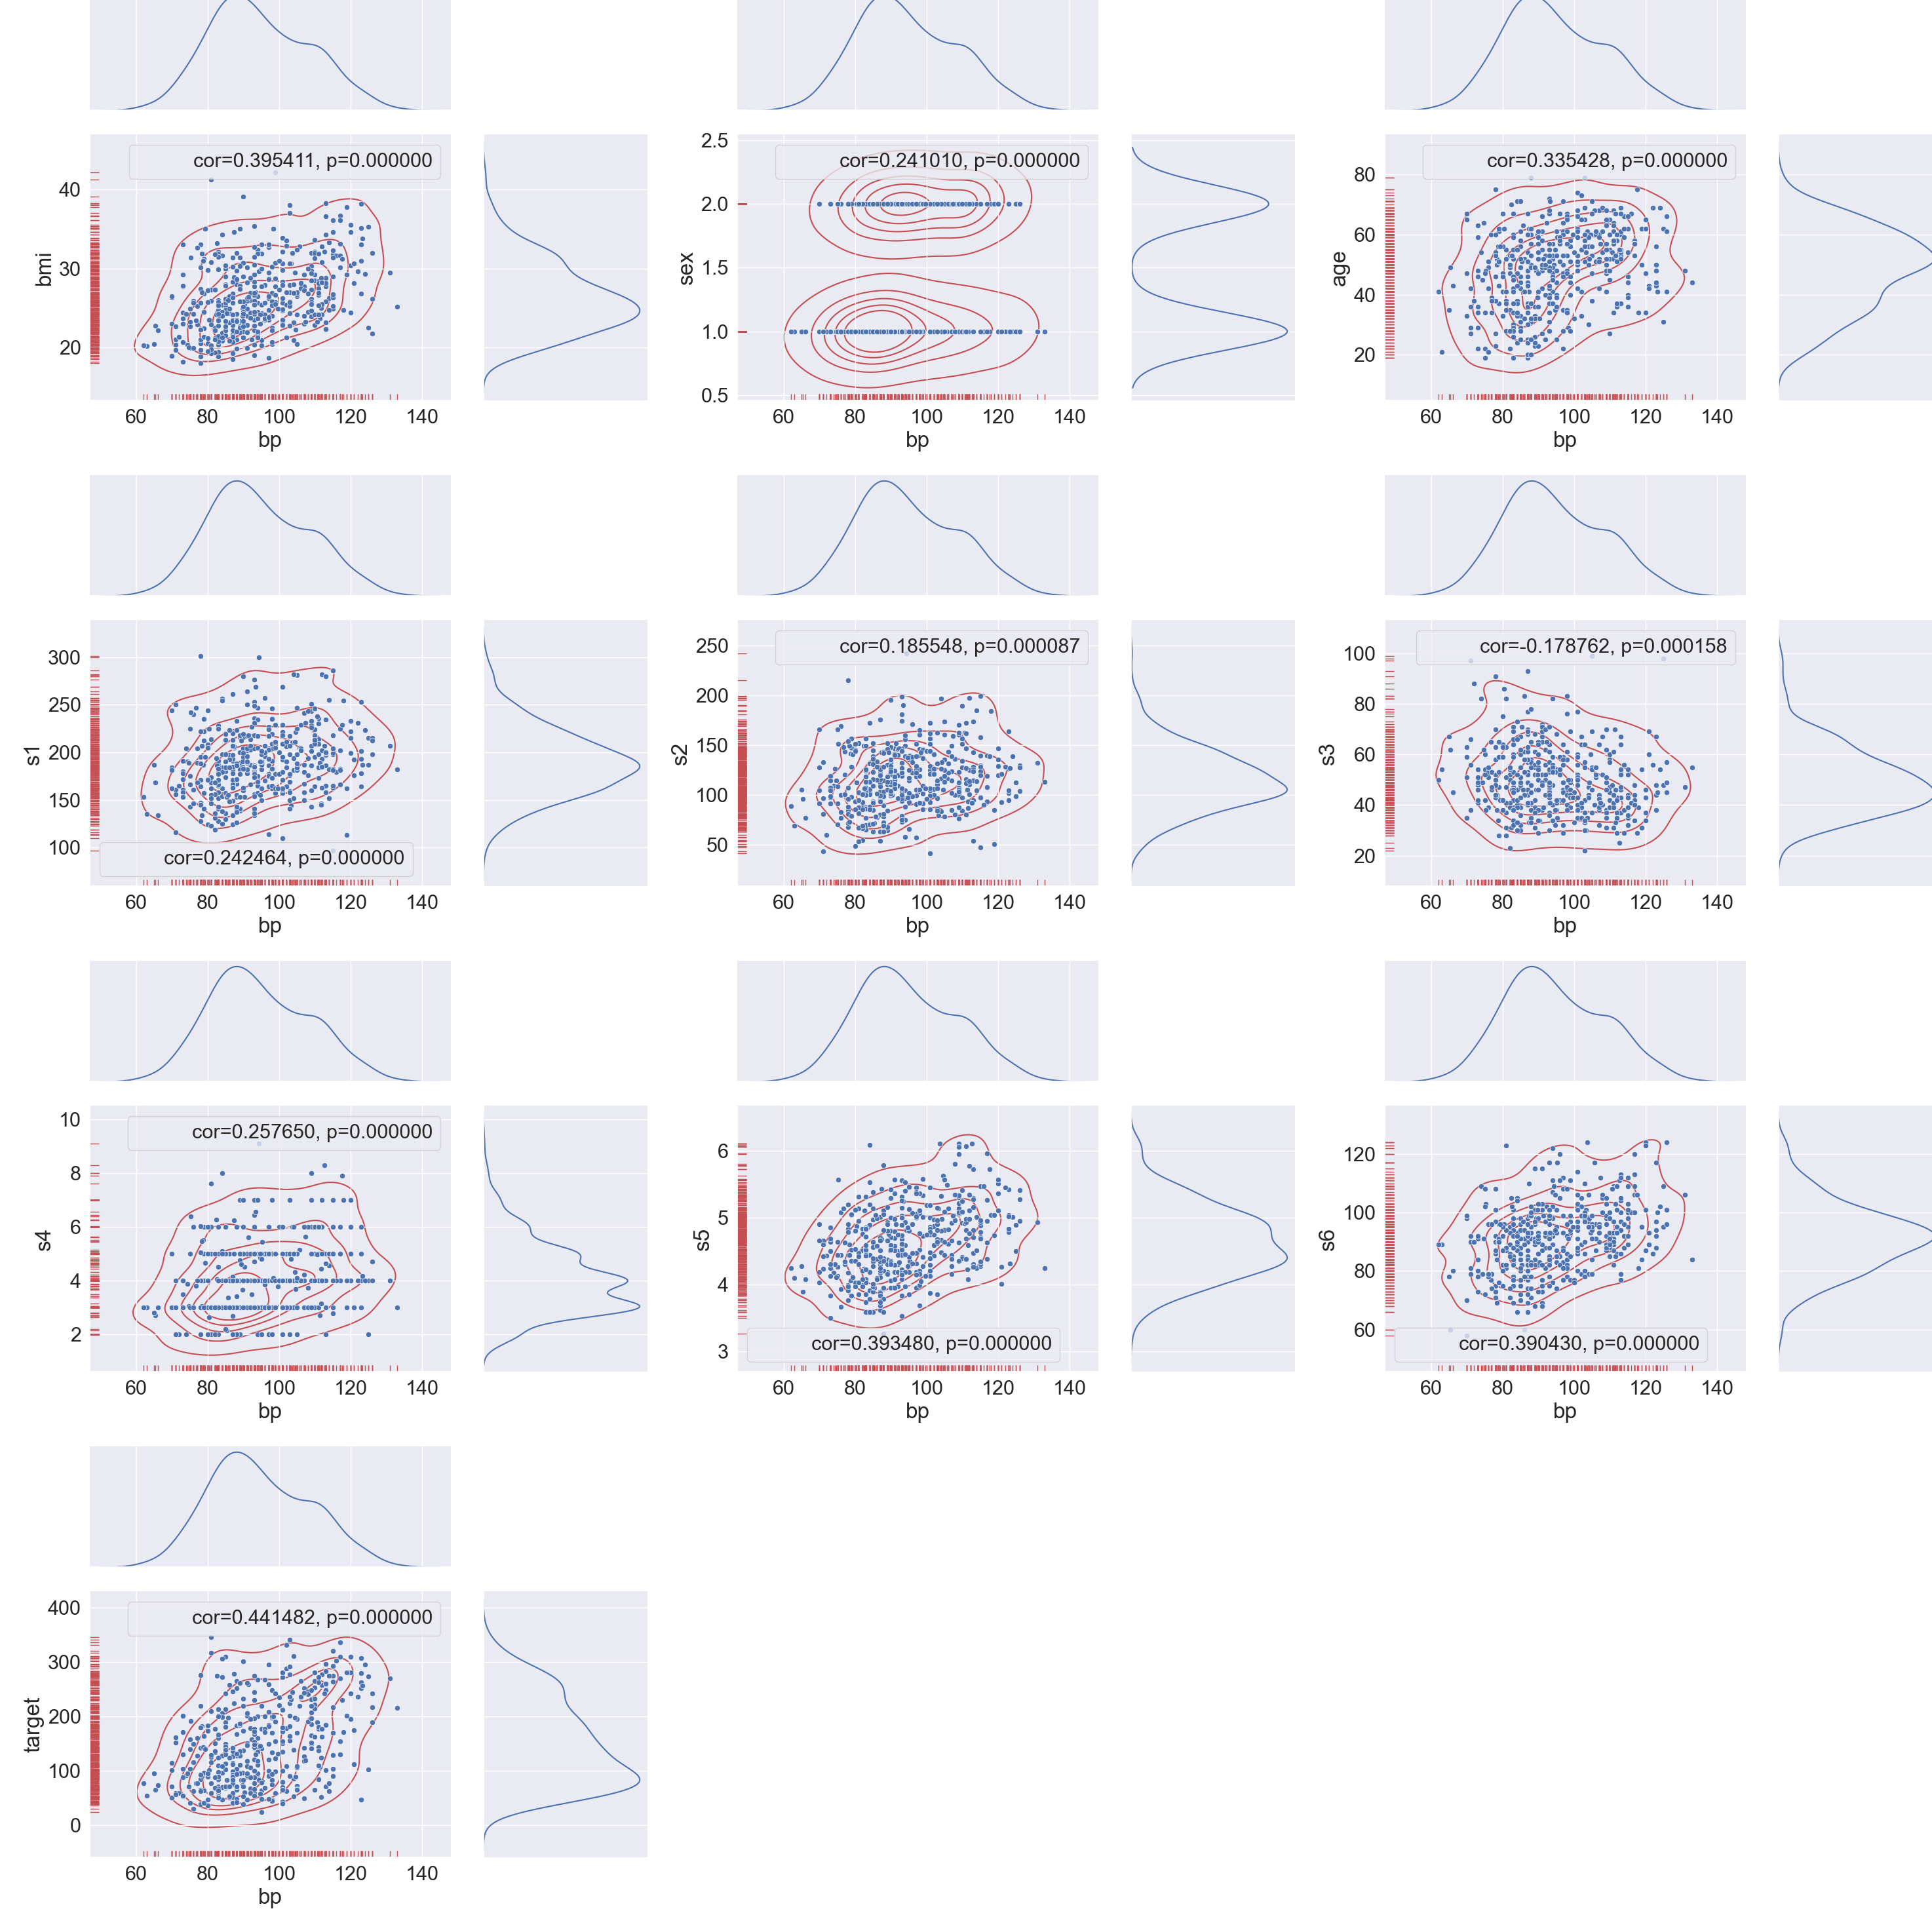

In [9]:
one_feat_compare_plot( data = df  ,
                    feat_name = "bp",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


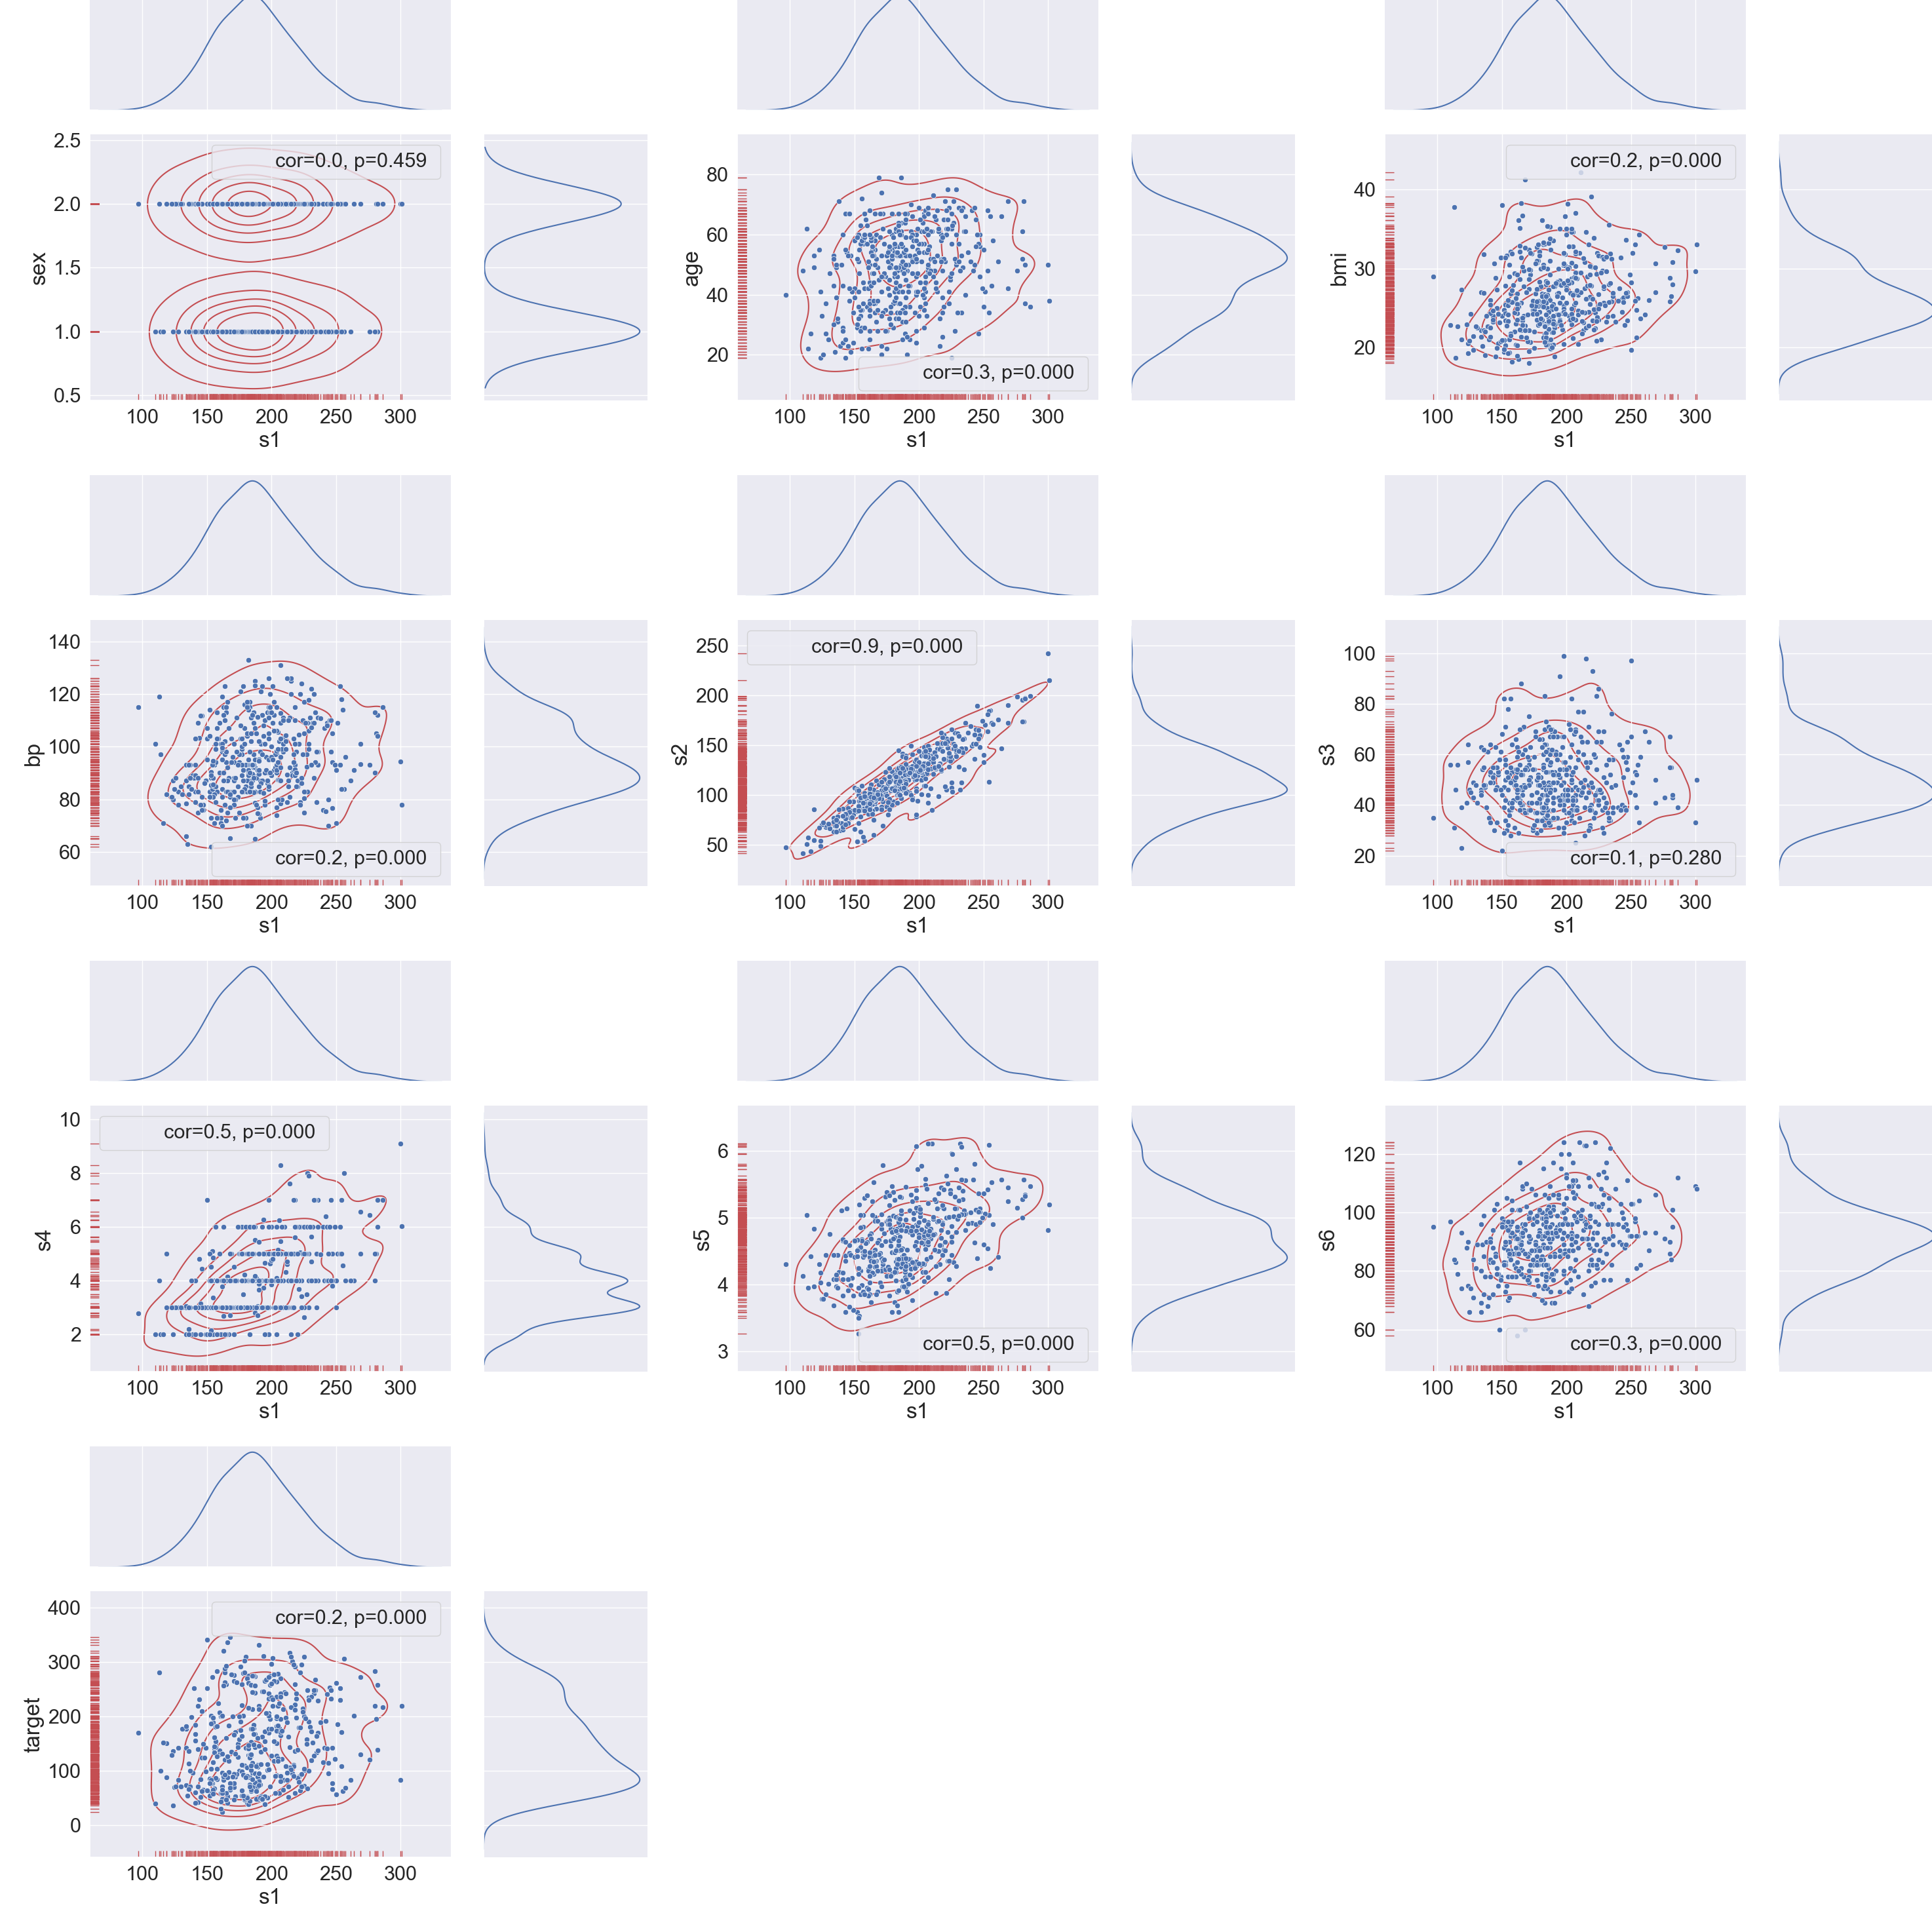

In [60]:
one_feat_compare_plot( data = df  ,
                    feat_name = "s1",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


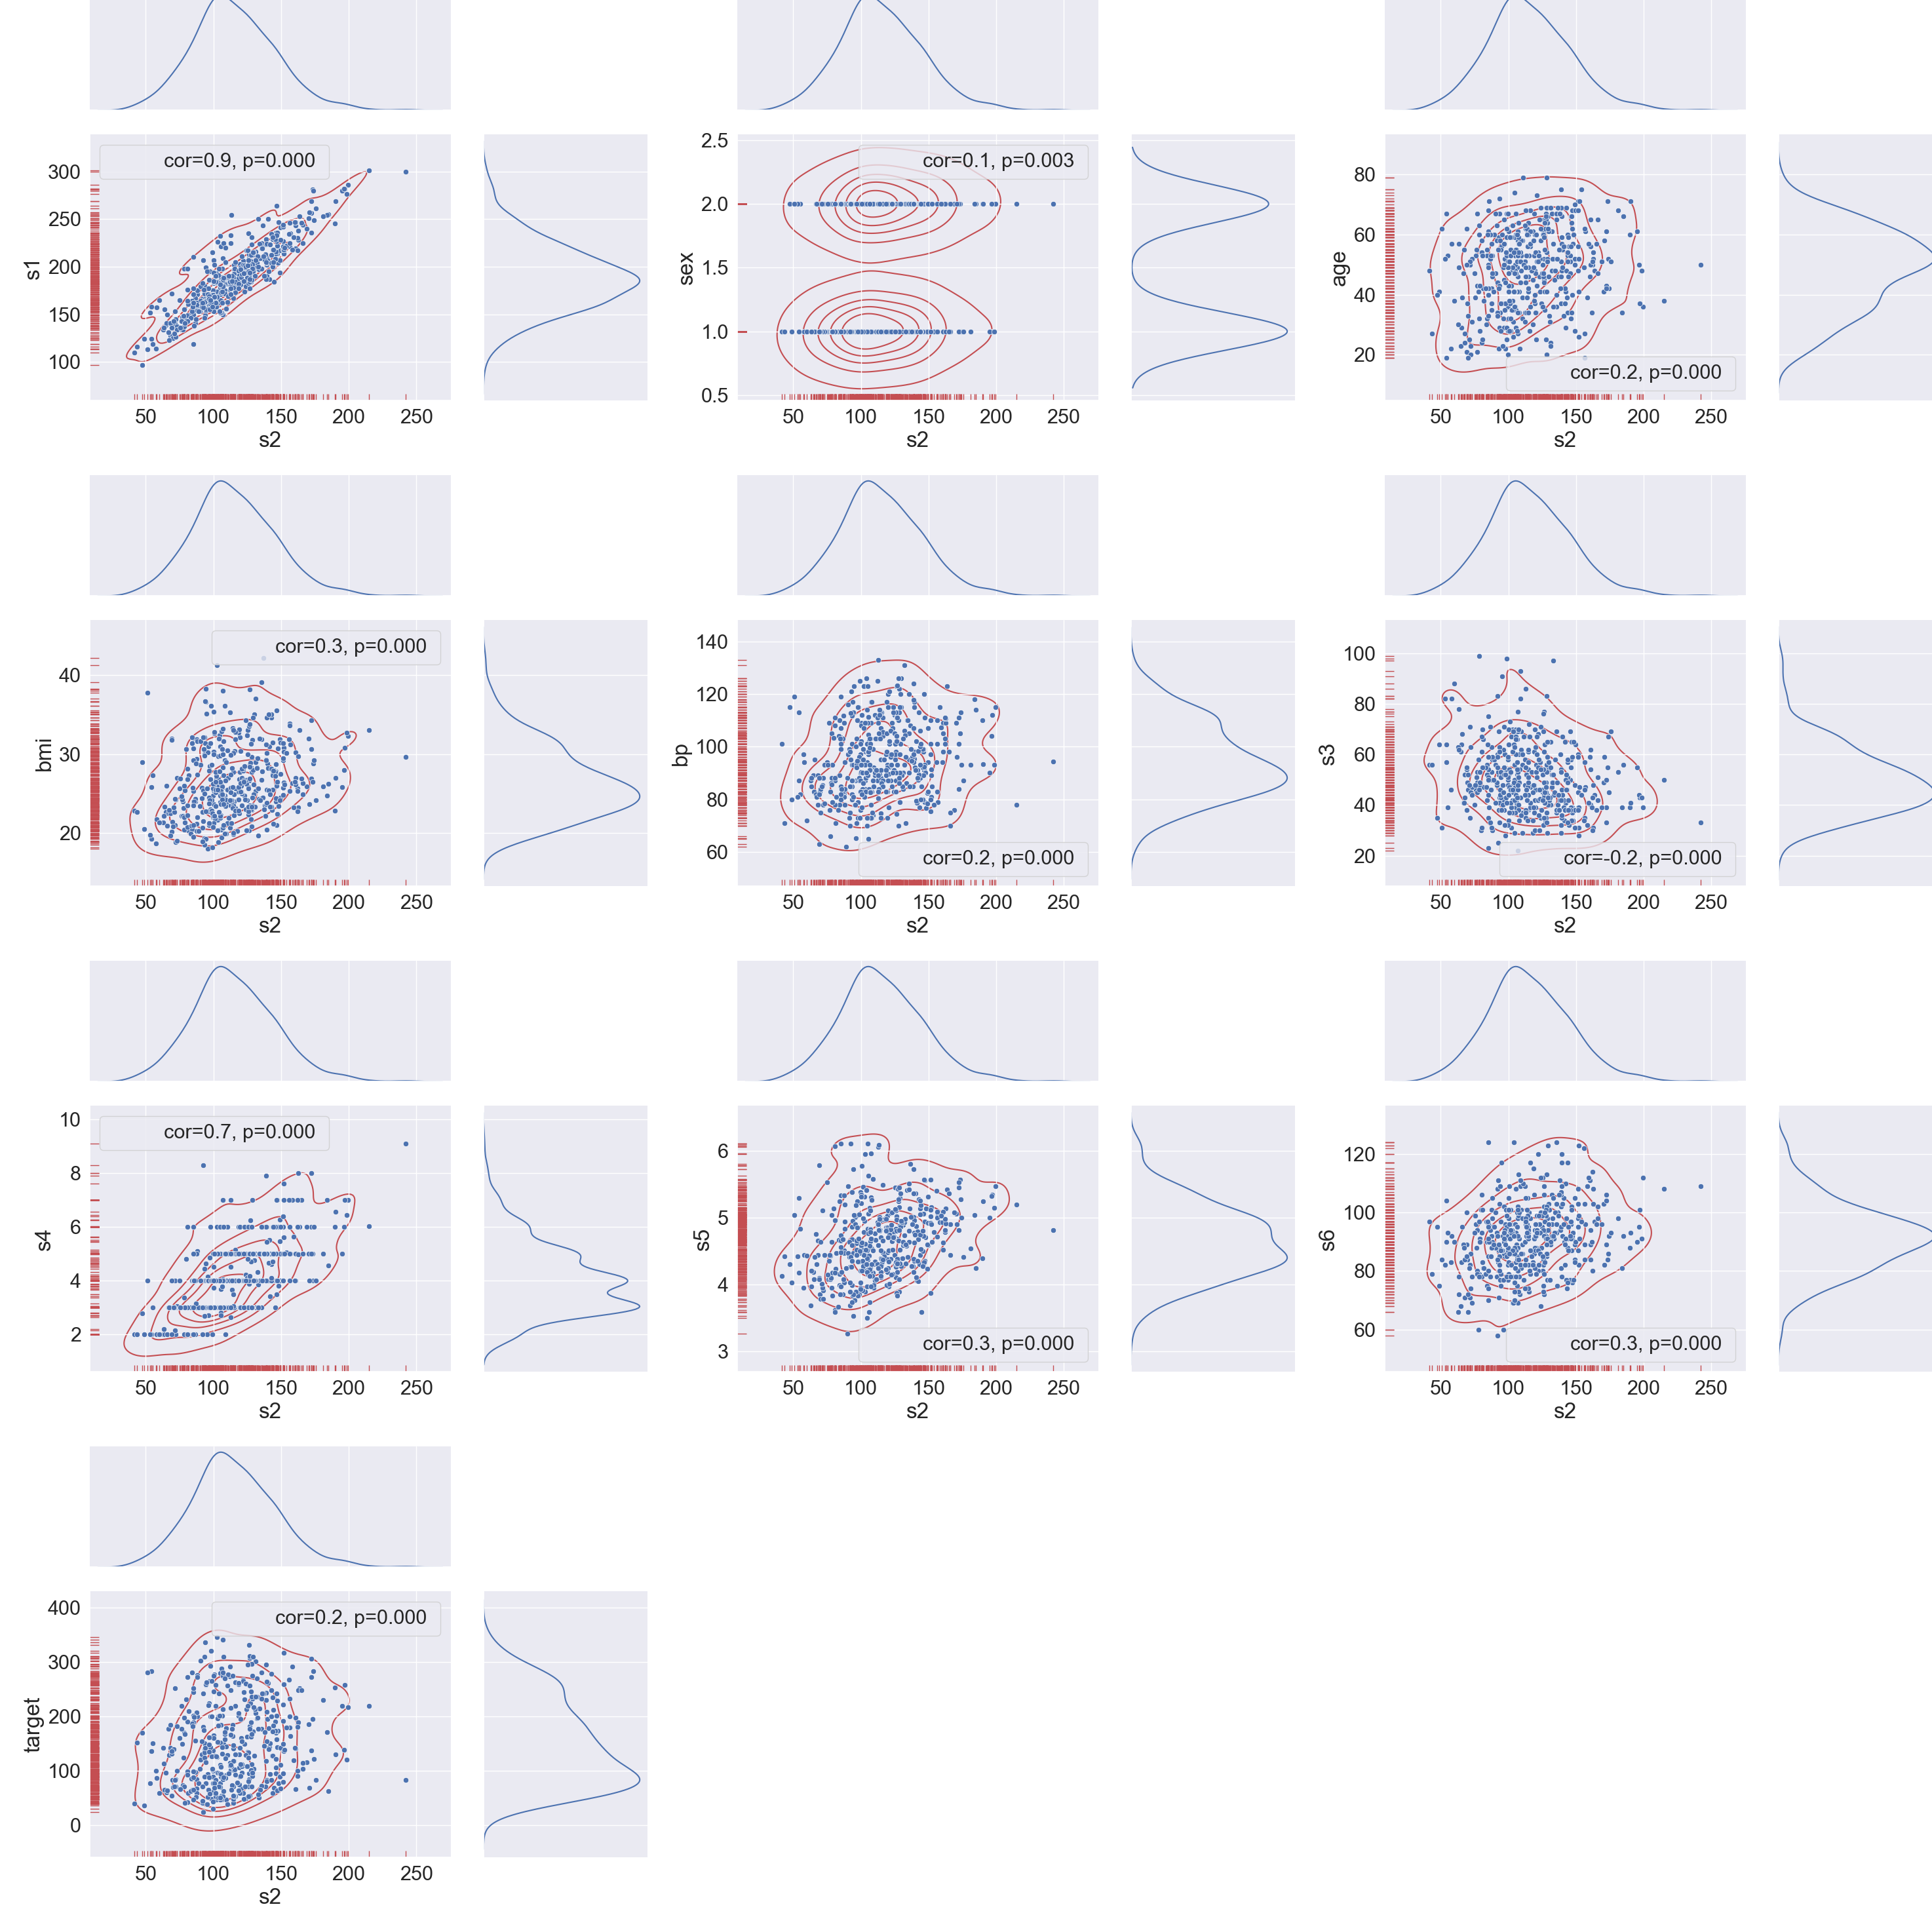

In [61]:
one_feat_compare_plot( data = df  ,
                    feat_name = "s2",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


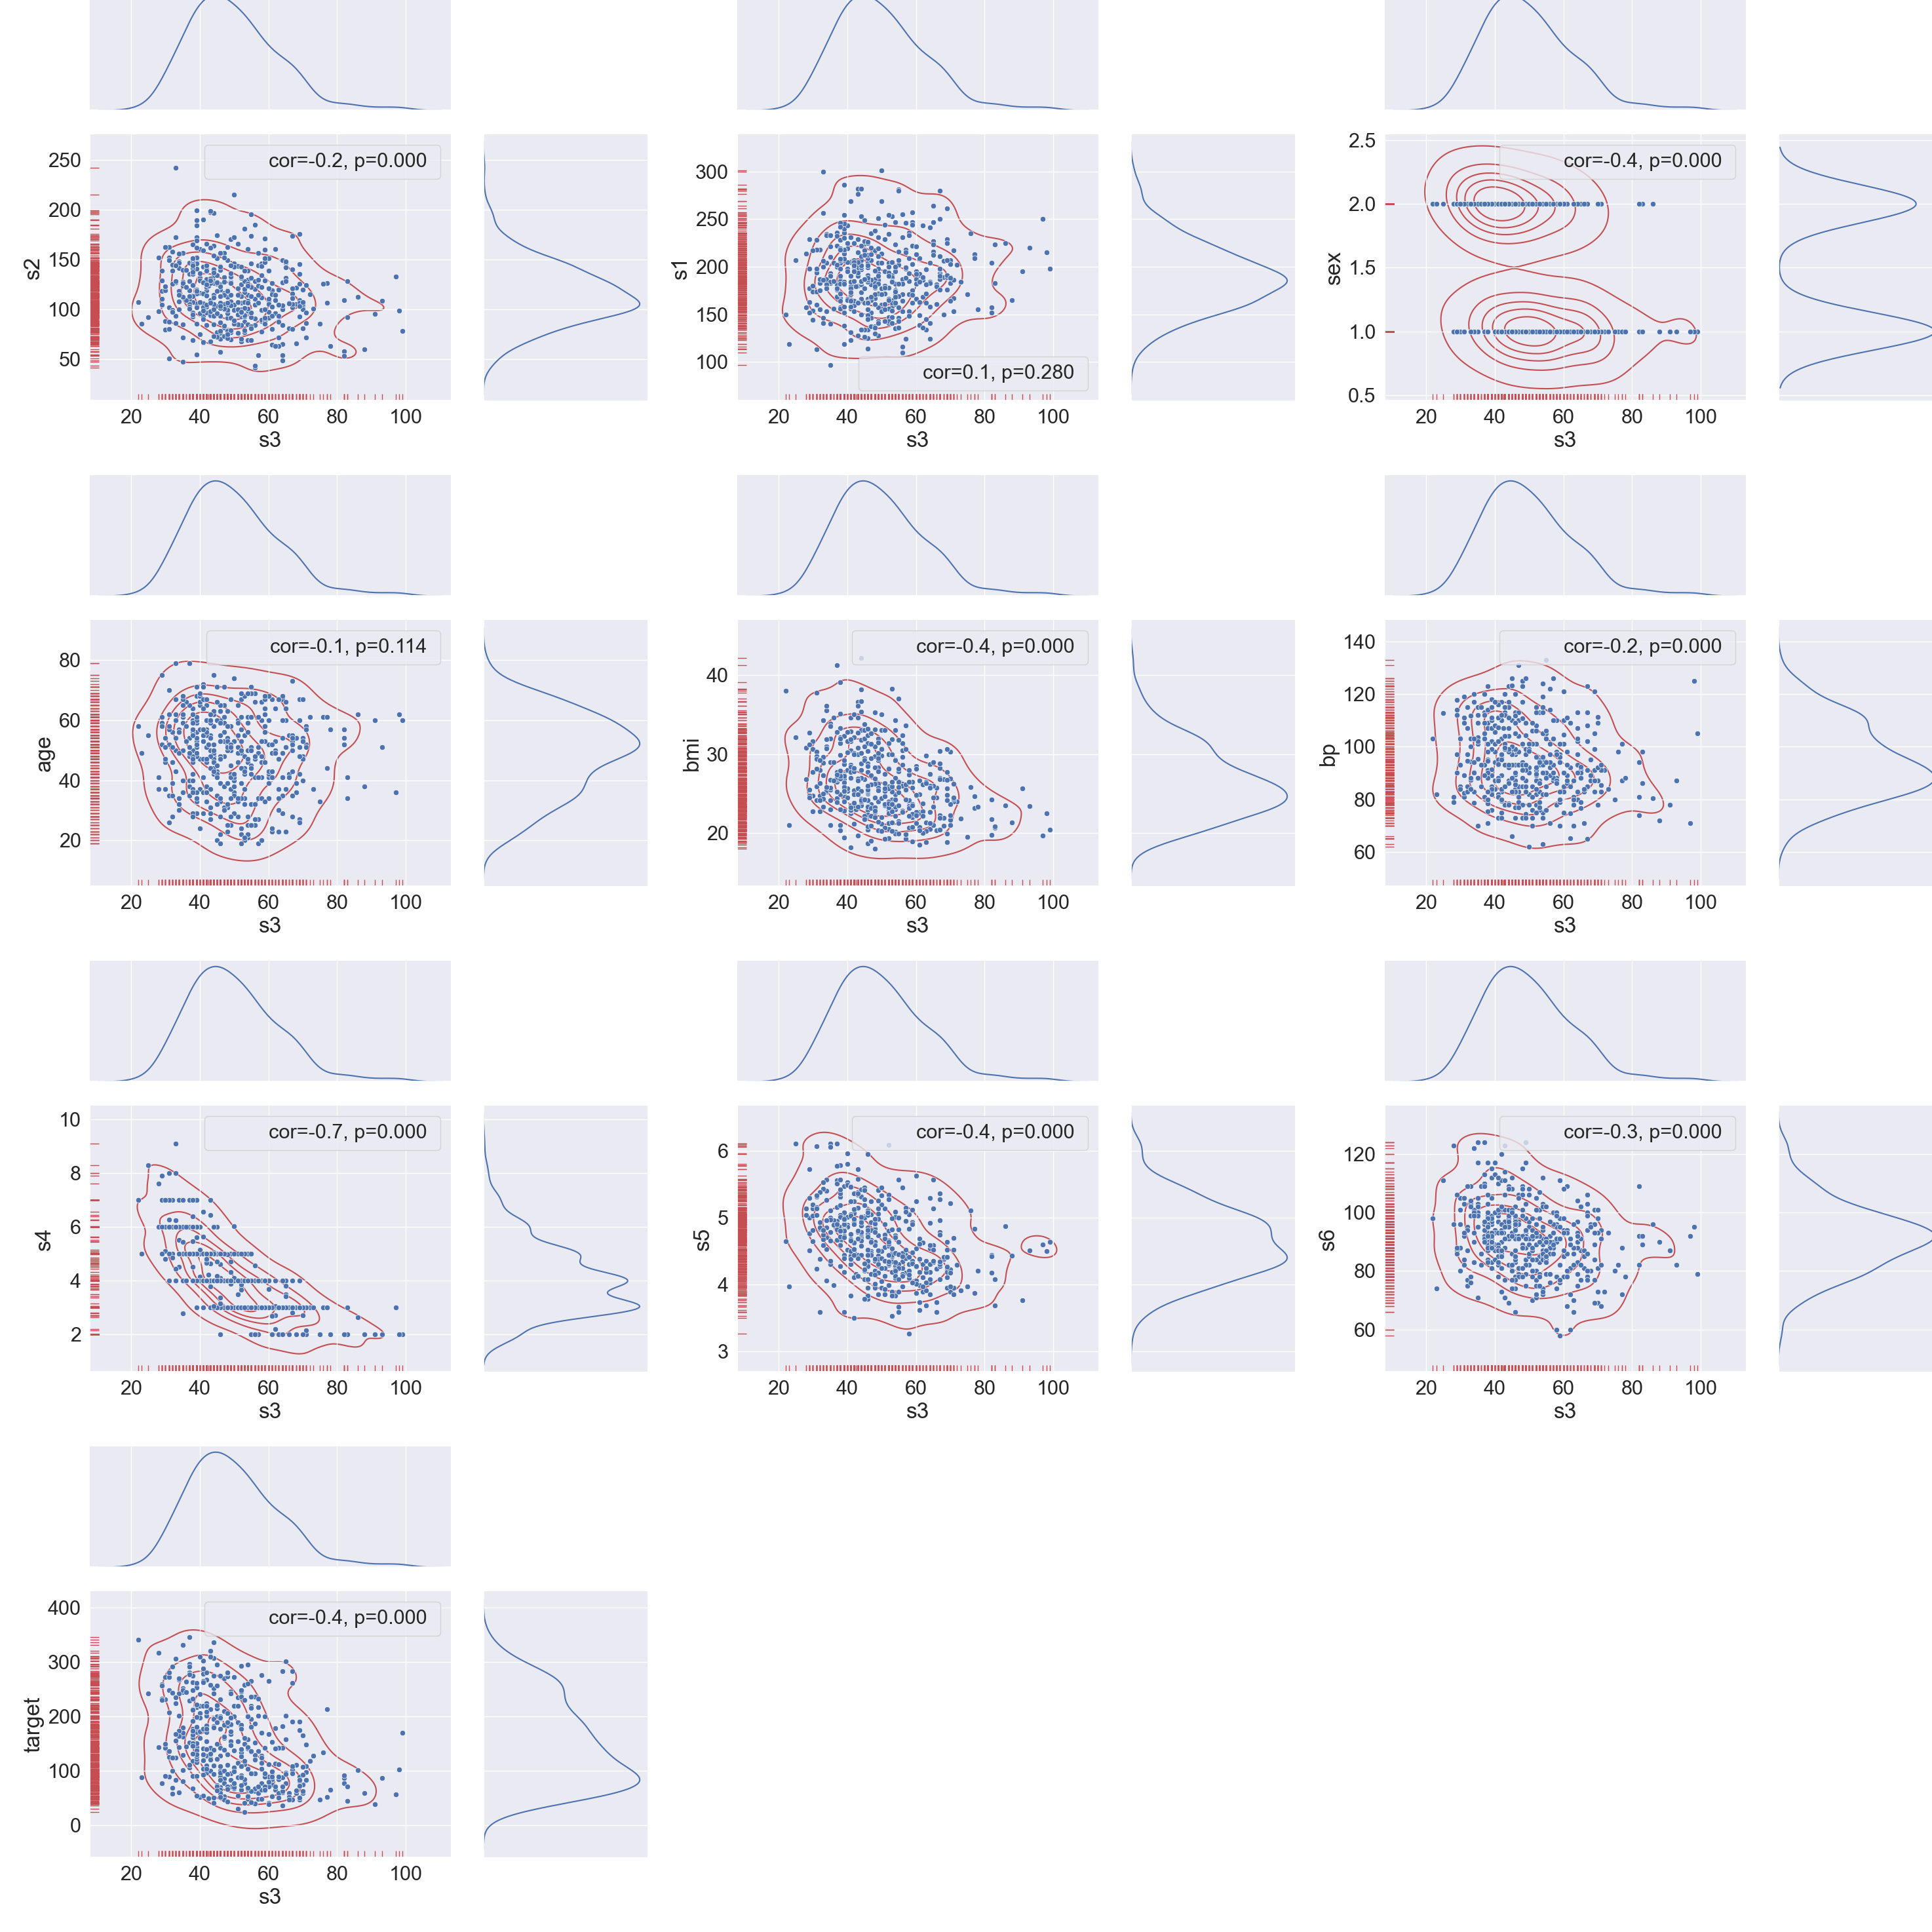

In [62]:
one_feat_compare_plot( data = df  ,
                    feat_name = "s3",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

 df_col_shift : 1  grid_row : 0  grid_col : 0
 df_col_shift : 2  grid_row : 0  grid_col : 1
 df_col_shift : 3  grid_row : 0  grid_col : 2
 df_col_shift : 4  grid_row : 1  grid_col : 0
 df_col_shift : 5  grid_row : 1  grid_col : 1
 df_col_shift : 6  grid_row : 1  grid_col : 2
 df_col_shift : 7  grid_row : 2  grid_col : 0
 df_col_shift : 8  grid_row : 2  grid_col : 1
 df_col_shift : 9  grid_row : 2  grid_col : 2
 df_col_shift : 10  grid_row : 3  grid_col : 0


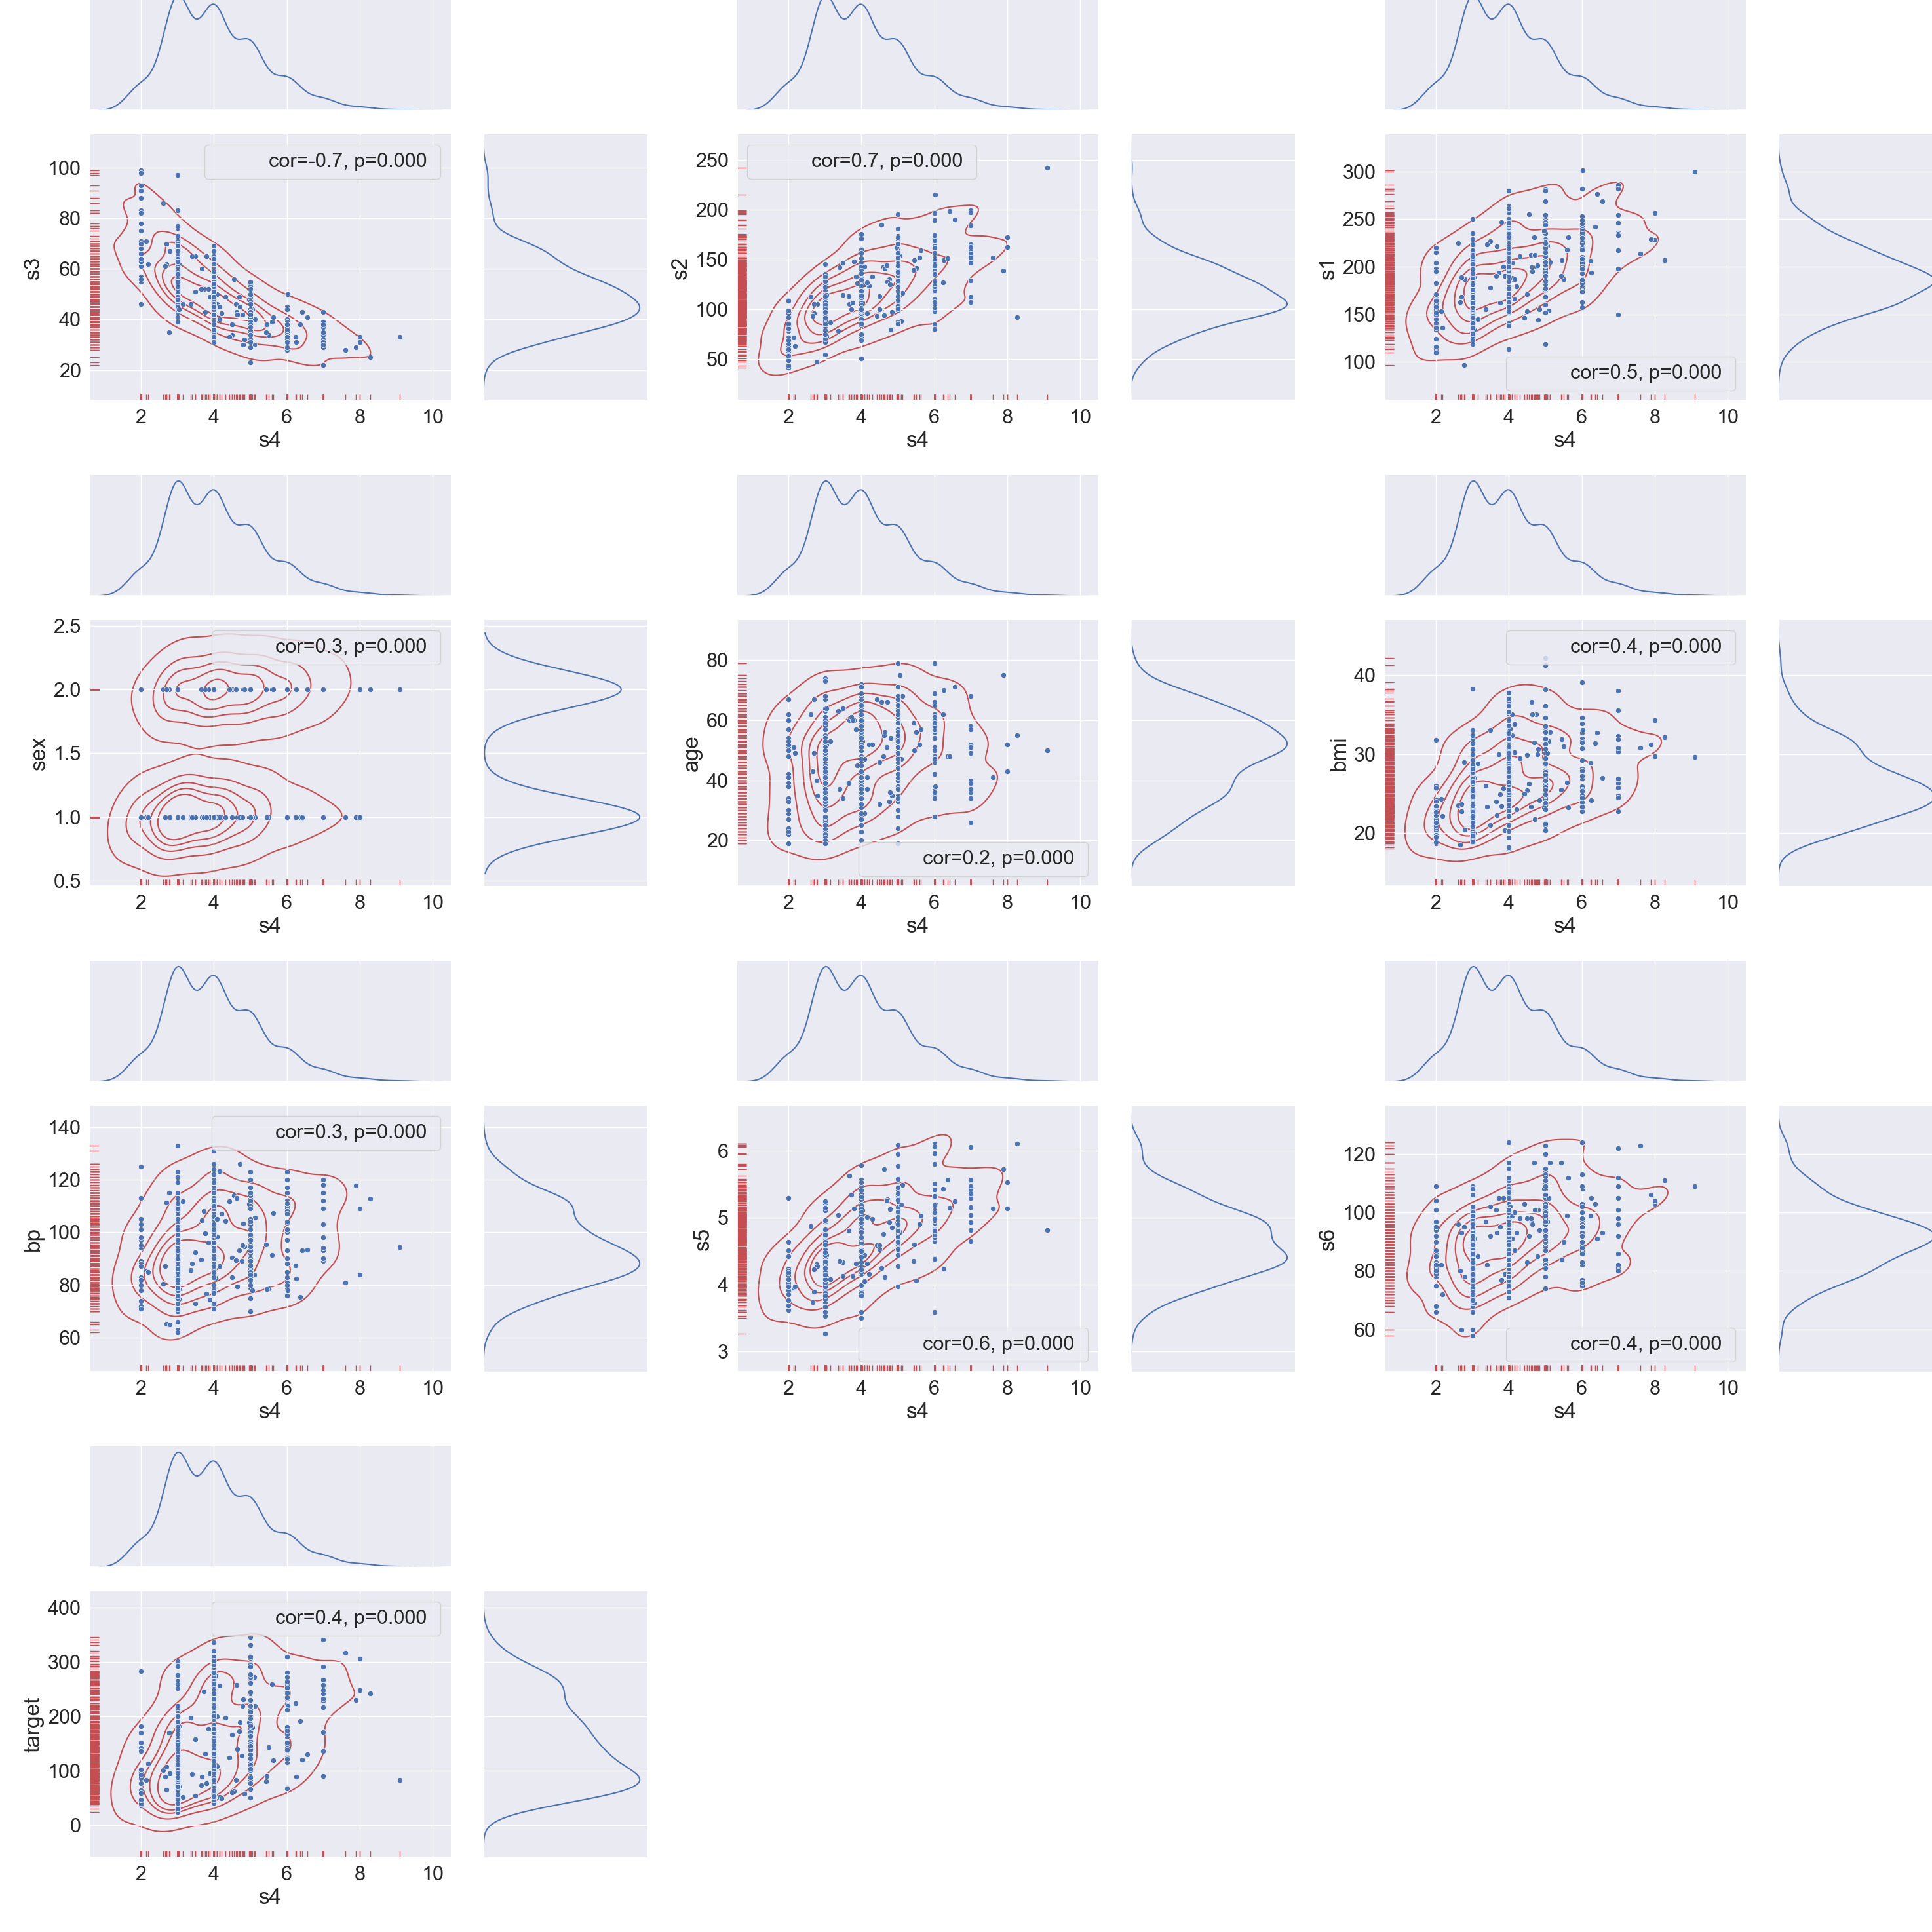

In [63]:
one_feat_compare_plot( data = df  ,
                    feat_name = "s4",
                    n_feat  = 10 , 
                    n_subp = 3 , 
                    font_scale = 2 ,
                    x_size = 30 , 
                    y_size = 30 )

<AxesSubplot:ylabel='Count'>

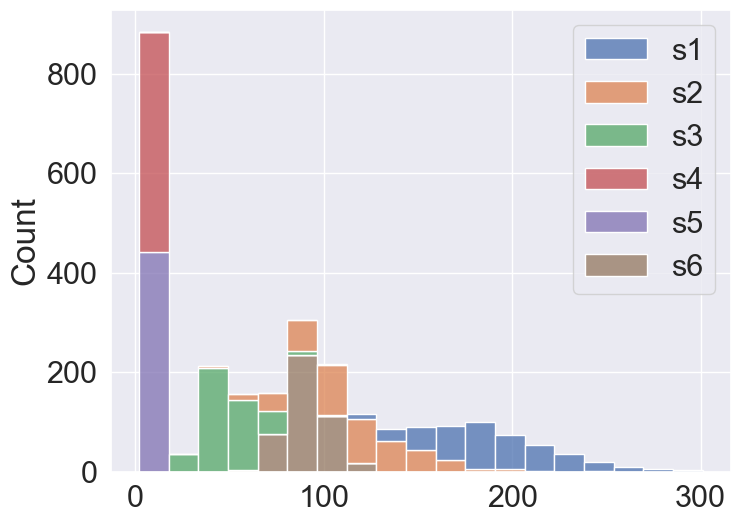

In [15]:
dimensions = (8, 6)
fig, ax = plt.subplots(figsize=dimensions)
sns.histplot(ax = ax  , data = df[df.columns[4:10]] , multiple="stack" )

TRANSFORMING CONTINUOUS DATA IN CATEGORICAL DATA
---

In [ ]:
df["s4_filtered"] = pd.cut(df.s4, bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])

In [ ]:
rf_base = RandomForestRegressor()

NameError: name 'RandomForestRegressor' is not defined